In [148]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [149]:
data = pd.read_csv('./data.csv', sep = ";")

In [150]:
data.tail()

,Unnamed: 0,Medida,1,2,3,4,5,6,7,8,9,10
7,NaN,Massa (g),1.150000,1.150000,1.160000,1.150000,1.160000,1.160000,1.160000,1.150000,1.150000,1.170000
8,NaN,Comprimento (mm),30.883470,30.883470,31.152022,30.883470,31.152022,31.152022,31.152022,30.883470,30.883470,31.420574
9,Anel 7,Diâmetro (mm),19.700000,19.900000,20.000000,19.450000,19.600000,19.400000,19.750000,19.800000,19.650000,19.600000
10,NaN,Massa (g),1.130000,1.130000,1.130000,1.120000,1.120000,1.130000,1.110000,1.120000,1.110000,1.120000
11,NaN,Comprimento (mm),30.346366,30.346366,30.346366,30.077815,30.077815,30.346366,29.809263,30.077815,29.809263,30.077815


In [151]:
data['Anel'] = pd.Series([15,15,15,4,4,4,11,11,11,7,7,7])

In [152]:
data = data.drop(columns = ['Unnamed: 0'])

In [153]:
data = data.set_index(['Anel', 'Medida'])

In [154]:
caracteristicas = data.copy().drop(columns = ['1','2','3','4','5','6','7','8','9','10'])
caracteristicas['1º Quartil'] = data.apply(lambda row: row.quantile(q = 0.25), axis = 1)
caracteristicas['Mediana'] = data.apply(lambda row: row.median(), axis = 1)
caracteristicas['Média'] = data.apply(lambda row: row.mean(), axis = 1)
caracteristicas['3º Quartil'] = data.apply(lambda row: row.quantile(q = 0.75), axis = 1)
caracteristicas['Interquartil'] = data.apply(lambda row: stats.iqr(row), axis = 1)
caracteristicas['Curtose'] = data.apply(lambda row: row.kurtosis(), axis = 1)

In [155]:
caracteristicas # copiar e colocar no tablegenerator do latex
# pra salvar como csv
# caracteristicas.to_csv('./caracteristicas.csv')

1º Quartil    Mediana      Média  3º Quartil  \
Anel Medida                                                           
15   Diâmetro (mm)      19.100000  19.300000  19.300000   19.462500   
     Massa (g)           1.122500   1.130000   1.129000    1.130000   
     Comprimento (mm)   30.144953  30.346366  30.319511   30.346366   
4    Diâmetro (mm)      20.050000  20.250000  20.175000   20.250000   
     Massa (g)           1.110000   1.120000   1.114000    1.120000   
     Comprimento (mm)   29.809263  30.077815  29.916683   30.077815   
11   Diâmetro (mm)      20.500000  20.550000  20.555000   20.600000   
     Massa (g)           1.150000   1.155000   1.156000    1.160000   
     Comprimento (mm)   30.883470  31.017746  31.044601   31.152022   
7    Diâmetro (mm)      19.600000  19.675000  19.685000   19.787500   
     Massa (g)           1.120000   1.120000   1.122000    1.130000   
     Comprimento (mm)   30.077815  30.077815  30.131525   30.346366   

                       Interquartil   Curtose  
Anel Medida                                    
15   Diâmetro (mm)         0.362500  0.699836  
     Massa (g)             0.007500  3.613287  
     Comprimento (mm)      0.201414  3.613286  
4    Diâmetro (mm)         0.200000 -1.121187  
     Massa (g)             0.010000 -0.665458  
     Comprimento (mm)      0.268552 -0.665458  
11   Diâmetro (mm)         0.100000  0.438398  
     Massa (g)             0.010000 -0.146104  
     Comprimento (mm)      0.268552 -0.146104  
7    Diâmetro (mm)         0.187500 -0.438581  
     Massa (g)             0.010000 -1.074162  
     Comprimento (mm)      0.268552 -1.074162

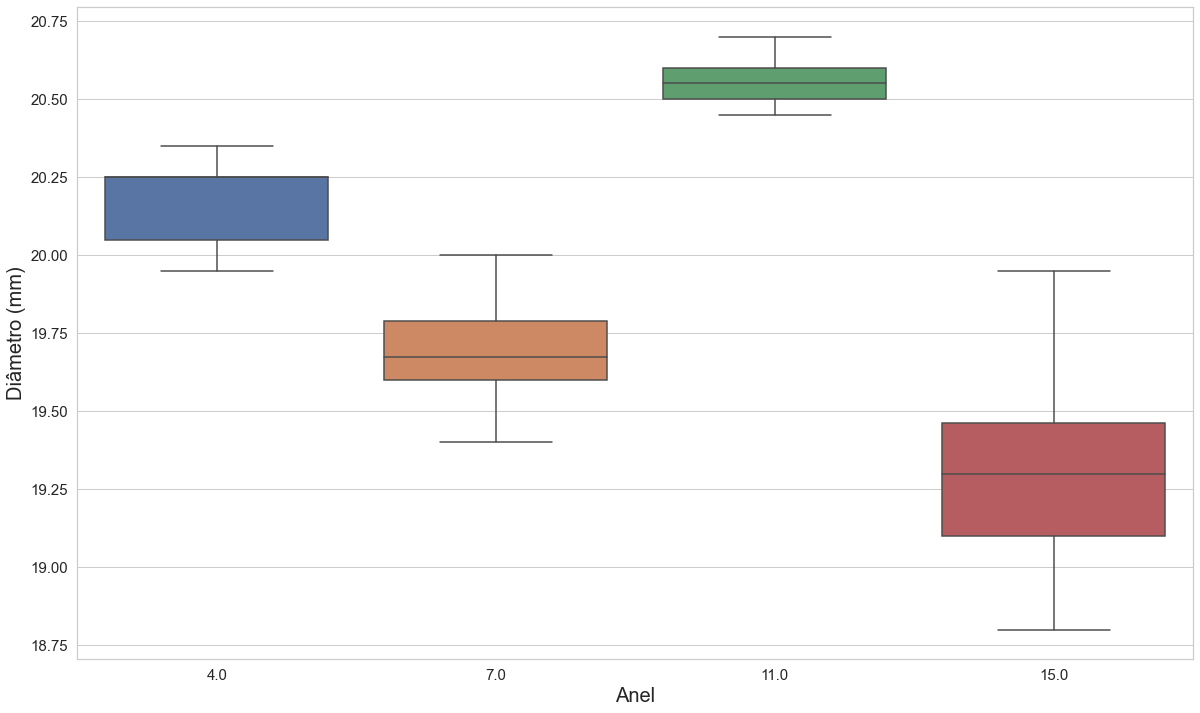

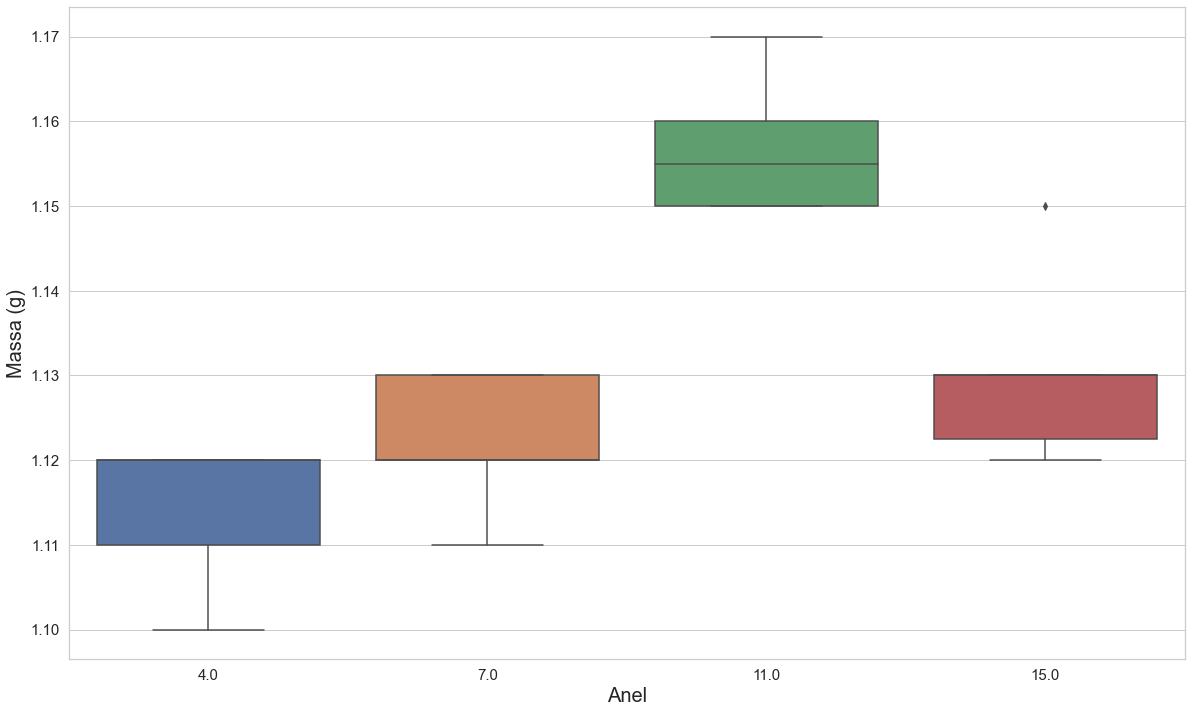

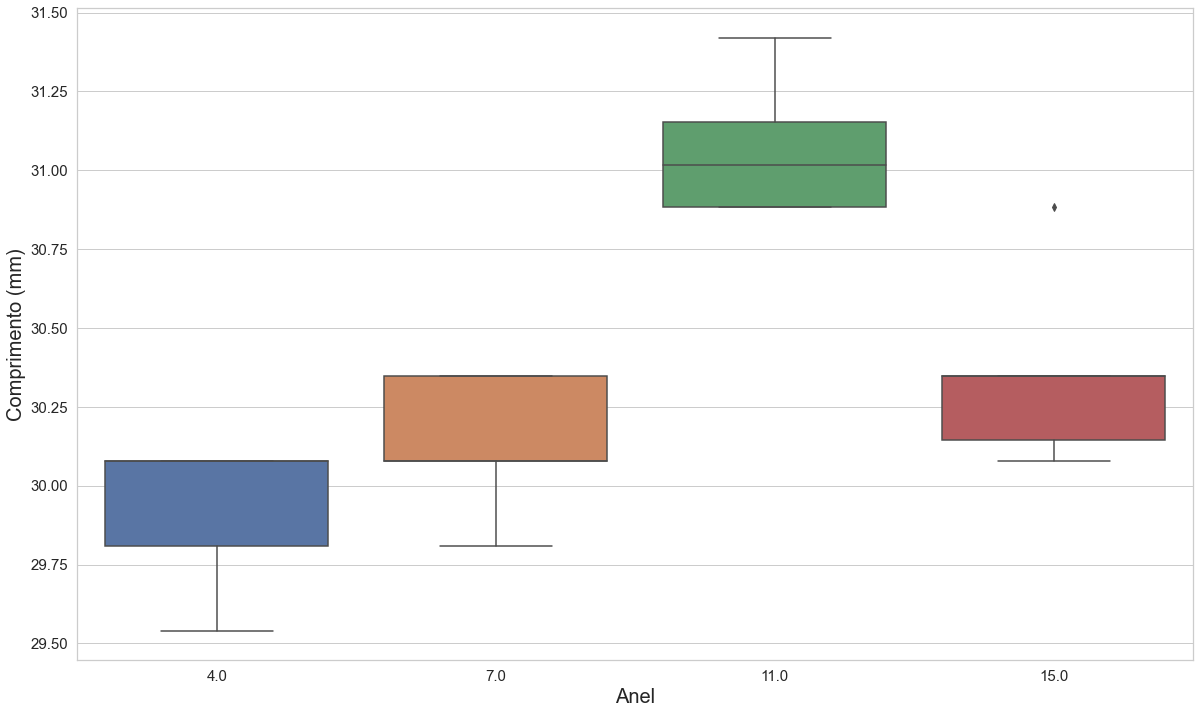

In [156]:
for medida in ['Diâmetro (mm)', 'Massa (g)', 'Comprimento (mm)']:
    df_medida = data.reset_index().loc[data.reset_index()['Medida'] == medida].drop(columns = ['Medida']).T
    df_medida = df_medida.rename(columns=df_medida.iloc[0]).drop(df_medida.index[0]).reset_index()
    df_medida = pd.melt(df_medida, id_vars=['index'], value_vars=[15.,4.,11.,7.])
    df_medida['index'] = df_medida['index'].apply(lambda x: int(x))
    df_medida.columns = ['Medição', 'Anel', medida]

    plt.figure(figsize=(20, 12))
    sns.set(style="whitegrid")
    ax = sns.boxplot(x="Anel", y=medida, data=df_medida)
    ax.set_xlabel("Anel",fontsize=20)
    ax.set_ylabel(medida,fontsize=20)
    ax.tick_params(labelsize=15)
    plt.savefig(f'boxplot_{medida}.png', dpi=500)

In [157]:
def mean_confidence_interval(data, confidence=0.95):
#     print(data)
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return [m, m-h, m+h]

In [159]:
ci

aux
Anel Medida                                                             
15   Diâmetro (mm)     [19.300000000000004, 19.065757779616263, 19.53...
     Massa (g)             [1.129, 1.122736370443435, 1.135263629556565]
     Comprimento (mm)  [30.319511297, 30.15130032454789, 30.487722269...
4    Diâmetro (mm)      [20.175, 20.068028160529447, 20.281971839470554]
     Massa (g)           [1.114, 1.1079675808993574, 1.1200324191006428]
     Comprimento (mm)  [29.916683422000006, 29.754681652221016, 30.07...
11   Diâmetro (mm)      [20.555, 20.503167467839265, 20.606832532160734]
     Massa (g)            [1.156, 1.1509981823162487, 1.161001817683751]
     Comprimento (mm)  [31.044601471, 30.910276698345353, 31.17892624...
7    Diâmetro (mm)      [19.685, 19.551115880417534, 19.818884119582464]
     Massa (g)         [1.1219999999999999, 1.116357188627991, 1.1276...
     Comprimento (mm)  [30.131524956, 29.979986175603266, 30.28306373...

In [164]:
ci = data.copy().drop(columns = ['1','2','3','4','5','6','7','8','9','10'])
ci['aux'] = data.apply(lambda row: mean_confidence_interval(row), axis = 1)
ci['Intervalo Superior'] = ci['aux'].apply(lambda x: x[2])
ci['Média'] = ci['aux'].apply(lambda x: x[0])
ci['Intervalo Inferior'] = ci['aux'].apply(lambda x: x[1])
ci = ci.drop(columns = ['aux'])

In [165]:
ci

Intervalo Superior      Média  Intervalo Inferior
Anel Medida                                                             
15   Diâmetro (mm)              19.534242  19.300000           19.065758
     Massa (g)                   1.135264   1.129000            1.122736
     Comprimento (mm)           30.487722  30.319511           30.151300
4    Diâmetro (mm)              20.281972  20.175000           20.068028
     Massa (g)                   1.120032   1.114000            1.107968
     Comprimento (mm)           30.078685  29.916683           29.754682
11   Diâmetro (mm)              20.606833  20.555000           20.503167
     Massa (g)                   1.161002   1.156000            1.150998
     Comprimento (mm)           31.178926  31.044601           30.910277
7    Diâmetro (mm)              19.818884  19.685000           19.551116
     Massa (g)                   1.127643   1.122000            1.116357
     Comprimento (mm)           30.283064  30.131525           29.979986